/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2097
           1       1.00      0.96      0.98      2087
           2       0.78      0.82      0.80      2075
           3       0.87      0.92      0.89      2110
           4       0.77      0.81      0.79      2075
           5       0.97      0.96      0.96      2131
           6       0.74      0.59      0.65      2090
           7       0.93      0.94      0.93      2103
           8       0.96      0.97      0.97      2092
           9       0.95      0.96      0.95      2140

    accuracy                           0.88     21000
   macro avg       0.88      0.88      0.88     21000
weighted avg       0.88      0.88      0.88     21000

Confusion Matrix:
 [[1810    1   23   72    8    0  162    0   21    0]
 [   4 1999    8   53    7    1   13    0    2    0]
 [  11    0 1692   19  235    0  109    0    9    0]
 [  39    

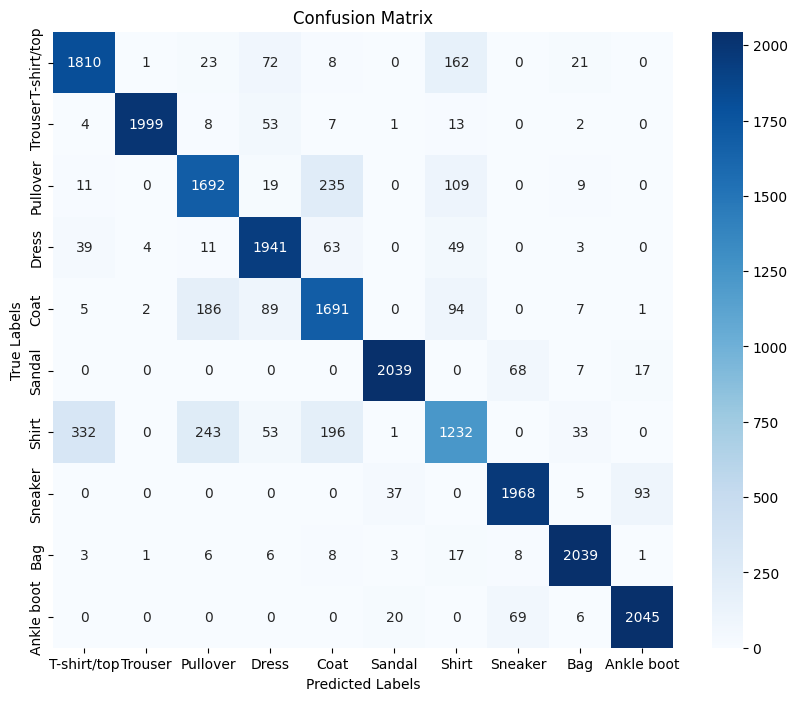

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Load the Fashion MNIST dataset
fashion_mnist = datasets.fetch_openml('Fashion-MNIST', version=1)
X = fashion_mnist.data
y = fashion_mnist.target.astype(int)

# Define the labels for the Fashion MNIST dataset
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Binarize the labels for ROC curve
y_bin = label_binarize(y, classes=np.unique(y))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Performance metrics
print("Classification report for Random Forest Classifier:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=fashion_labels, yticklabels=fashion_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

